# Pytorch Demo

In [1]:
import torch

In [2]:
x = torch.rand(5, 3)
print(x) # pytorch works with tensor object which can be put into gpu. 
# just be mindful the objects you are working with as sometimes you might need to convert the object
# back to numpy array (e.g. to plot or display images)

tensor([[0.2024, 0.9559, 0.1273],
        [0.1840, 0.0139, 0.8546],
        [0.9651, 0.7694, 0.4950],
        [0.5100, 0.8051, 0.5566],
        [0.1583, 0.0982, 0.6437]])


In [3]:
## The usual imports
import torch.nn as nn # nerual network modeling
import torch.nn.functional as F
import torchvision # dataset and dataset manipulation
import torchvision.transforms as transforms

## for printing image
import matplotlib.pyplot as plt
import numpy as np

In [4]:
print(torch.__version__)

2.3.1.post101


## Loading the Data
PyTorch provides two data primitives: 
- torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data
- torch.utils.data.DataLoader

torch.utils.data.Dataset allows you to use pre-loaded datasets as well as your own data and 
torch.utils.data.DataLoader is an iterator which helps us loop through the data while being able to
- Batching the data
- Shuffling the data
- Load the data in parallel using multiprocessing workers.

In [6]:
## parameter denoting the batch size
BATCH_SIZE = 32

## transformations 
transform = transforms.Compose(
    [transforms.ToTensor()]) # To Tensor: to convert the numpy images to torch images 

## download and load training dataset. We gonna use the MNIST data sets.
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

Use the matplotlib libirary to chek out the images

In [8]:
## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy() # the .numpy() converts a tensor object into an numpy.ndarray object.
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # display 2d-data as a grayscale image

## get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

iter() calls the __iter__() method on the trainloader which returns an iterator. 
next() then calls the __next__() method on that iterator to get the first iteration. 
Running next() again will get the second item of the iterator, etc.


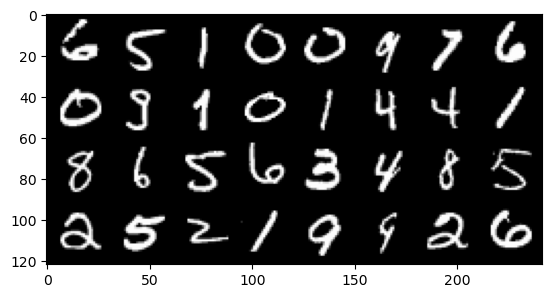

In [10]:
## show images
imshow(torchvision.utils.make_grid(images)) # make a gird of images and show them

In [18]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break # break to just show the first loop 

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimens

The images are 28 by 28 matrices with its element being range from 0 to 255.Each batch has 32 images.

In [20]:
model = nn.Sequential(
    nn.Flatten(1, -1), # Flatten the image into a 1d vector
    nn.Linear(28*28, 128),
    nn.ReLU(), # zero out any negative value
    nn.Linear(128, 10),
    nn.Softmax(dim=1) # make the vector sum to 1. Good for giving probability estimates
)

In [22]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
  (4): Softmax(dim=1)
)


In [24]:
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images) # output/prediction
    print(out.shape)
    break

batch size: torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


In [25]:
learning_rate = 0.001
num_epochs = 5 # pronuce as ee-pok / ee-pods

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device) # move model to GPU
criterion = nn.CrossEntropyLoss() # set objective function 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
## utility function to compute accuracy
def get_accuracy(output, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [30]:
## train the model
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    ## commence training
    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device) # move things to GPU
        labels = labels.to(device) # move things to GPU

        ## forward + backprop + loss
        predictions = model(images) # input image and output predciction
        loss = criterion(predictions, labels) # compute the loss given the label and prediction
        optimizer.zero_grad()
        loss.backward() # compute gradient/backward propagation

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item() #keep track of loss in each step
        train_acc += get_accuracy(predictions, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i)) 

Epoch: 0 | Loss: 1.5824 | Train Accuracy: 89.99
Epoch: 1 | Loss: 1.5222 | Train Accuracy: 94.53
Epoch: 2 | Loss: 1.5075 | Train Accuracy: 95.86
Epoch: 3 | Loss: 1.4993 | Train Accuracy: 96.63
Epoch: 4 | Loss: 1.4931 | Train Accuracy: 97.21


In [34]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 96.98


In [35]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
  (4): Softmax(dim=1)
)


In [36]:
print(outputs)

tensor([[8.6591e-13, 9.9902e-01, 7.3804e-07, 2.9040e-04, 1.3598e-11, 4.7194e-11,
         6.8486e-10, 5.4519e-04, 1.4069e-04, 4.5835e-08],
        [2.8526e-16, 3.8973e-16, 1.0000e+00, 6.3355e-09, 2.4115e-31, 4.6356e-20,
         5.6202e-24, 4.3376e-11, 4.7201e-10, 1.3818e-15],
        [1.7965e-13, 3.1830e-12, 3.5328e-07, 9.9999e-01, 8.9533e-29, 1.3247e-07,
         1.8959e-21, 9.7101e-14, 8.8185e-06, 2.3883e-09],
        [5.3294e-19, 6.0853e-23, 1.4609e-18, 1.5689e-17, 1.0000e+00, 2.3650e-16,
         4.0621e-18, 1.9115e-13, 8.5986e-12, 4.2032e-08],
        [2.4404e-13, 1.0603e-23, 4.5207e-18, 1.3459e-09, 3.7559e-20, 1.0000e+00,
         9.8452e-26, 7.8768e-21, 3.2429e-09, 5.3624e-17],
        [9.0854e-14, 2.1634e-19, 8.6174e-11, 6.7719e-17, 6.4798e-15, 1.1555e-11,
         1.0000e+00, 1.4259e-26, 2.3056e-13, 9.5193e-24],
        [6.4054e-17, 2.6938e-22, 4.6969e-09, 4.2518e-08, 2.3098e-25, 3.0554e-22,
         5.0963e-31, 1.0000e+00, 1.0978e-11, 4.3489e-12],
        [5.7285e-08, 3.1069

In [37]:
torch.sum(outputs, 1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
       grad_fn=<SumBackward1>)

tensor([[4.8547e-09, 2.9406e-23, 2.3254e-08, 5.2336e-06, 1.1687e-18, 5.2355e-14,
         7.0707e-26, 9.9999e-01, 1.3542e-10, 6.9151e-10],
        [4.0348e-11, 3.6788e-15, 1.0000e+00, 2.8386e-09, 8.6929e-38, 2.4946e-11,
         2.4263e-11, 5.8364e-32, 2.5623e-11, 7.4821e-30],
        [5.7151e-11, 9.9995e-01, 2.9204e-05, 6.7540e-06, 2.1168e-09, 8.9684e-09,
         8.3898e-07, 7.8295e-06, 7.2812e-06, 1.7445e-10],
        [1.0000e+00, 2.5087e-22, 8.8216e-10, 3.4271e-14, 4.9596e-21, 1.4591e-12,
         3.9233e-13, 2.0653e-12, 1.9500e-17, 2.5719e-17],
        [4.3800e-10, 8.8627e-16, 1.1578e-09, 1.8678e-16, 9.9939e-01, 1.0769e-12,
         3.9348e-11, 7.3186e-08, 7.4781e-10, 6.0672e-04],
        [1.9386e-13, 9.9999e-01, 1.1567e-07, 4.3683e-07, 4.5849e-12, 7.6817e-13,
         7.9150e-11, 9.7211e-06, 2.9445e-07, 5.6701e-11],
        [4.2624e-15, 1.1093e-16, 3.7093e-13, 7.8198e-12, 9.9999e-01, 1.9971e-11,
         5.7475e-13, 4.4892e-09, 1.2600e-05, 4.9255e-07],
        [7.6601e-17, 2.0544

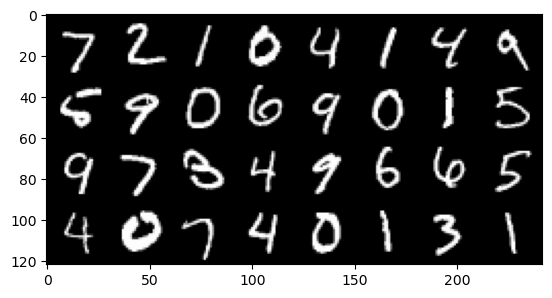

In [62]:
## Check out test images
dataiter = iter(testloader)
images, labels = next(dataiter)

## show images
print(model(images))
imshow(torchvision.utils.make_grid(images)) # make a gird of images and show them
print(torch.max(model(images), 1))